<a href="https://colab.research.google.com/github/mirsazzathossain/CSE317-Lab/blob/autumn_2022/Lab_Assignment_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*   Mustaqueem Alam
*   2220769
*   Spring 2025
*   Section 01

#### **Polynomial Regression**

In this assignment, you will implement polynomial regression and apply it to the [Assignment 4 Dataset](https://minhaskamal.github.io/DownGit/#/home?url=https://github.com/mirsazzathossain/CSE317-Lab-Numerical-Methods/blob/main/datasets/data.csv).

The dataset contains two columns, the first column is the feature and the second column is the label. The goal is find the best fit line for the data.

You will need to perform the following regression tasks and find the best one for the dataset.

1.    **Linear Regression:**

     The equation we are trying to fit is:
     $$y = \theta_0 + \theta_1 x$$
     where $x$ is the feature and $y$ is the label.

     We can rewrite the equation in vector form as:
$$Y = X\theta$$ where $X$ is a matrix with two columns, the first column is all 1s and the second column is the feature, and $Y$ is a vector with the labels. $\theta$ is a vector with two elements, $\theta_0$ and $\theta_1$. The $X$ matrix will look like this:
$$X = \begin{bmatrix} 1 & x_1 \\ 1 & x_2 \\ \vdots & \vdots \\ 1 & x_n \end{bmatrix}$$
2. **Quadratic Regression:**

     The equation we are trying to fit is:
     $$y = \theta_0 + \theta_1 x + \theta_2 x^2$$
     where $x$ is the feature and $y$ is the label.

     We can rewrite the equation in vector form as:
$$Y = X\theta$$where $X$ is a matrix with three columns, the first column is all 1s, the second column is the feature, and the third column is the feature squared, and $Y$ is a vector with the labels. $\theta$ is a vector with three elements, $\theta_0$, $\theta_1$, and $\theta_2$. The $X$ matrix will look like this:

$$X = \begin{bmatrix} 1 & x_1 & x_1^2 \\ 1 & x_2 & x_2^2 \\ \vdots & \vdots & \vdots \\ 1 & x_n & x_n^2 \end{bmatrix}$$
3. **Cubic Regression:**

     The equation we are trying to fit is:
$$y = \theta_0 + \theta_1 x + \theta_2 x^2 + \theta_3 x^3$$
     where $x$ is the feature and $y$ is the label.

     We can rewrite the equation in vector form as:
$$Y = X\theta$$where $X$ is a matrix with four columns, the first column is all 1s, the second column is the feature, the third column is the feature squared, and the fourth column is the feature cubed, and $Y$ is a vector with the labels. $\theta$ is a vector with four elements, $\theta_0$, $\theta_1$, $\theta_2$, and $\theta_3$. The $X$ matrix will look like this:
$$X = \begin{bmatrix} 1 & x_1 & x_1^2 & x_1^3 \\ 1 & x_2 & x_2^2 & x_2^3 \\ \vdots & \vdots & \vdots & \vdots \\ 1 & x_n & x_n^2 & x_n^3 \end{bmatrix}$$

Take 15 data points from the dataset and use them as the training set. Use the remaining data points as the test set. For each regression task, find the best $\theta$ vector using the training set. Then, calculate the mean squared error (MSE) on the test set. Plot the training set, the test set (in a different color), and the best fit line for each regression task. Which regression task gives the best fit line? Which regression task gives the lowest MSE on the test set? Report your answers in a Markdown cell.

**Note:** Do not use any built-in functions like `np.polyfit` or `sklearn.linear_model.LinearRegression` or any other built-in functions that perform polynomial regression. You must implement the regression tasks yourself.

Step 1: Import Packages and Mount drive

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Step 2: Reading and separation of the dataset

In [59]:
file_path =  '/content/drive/My Drive/Numerical_Lab_Datasets/data.csv'
df = pd.read_csv(file_path)
df = df.to_numpy()
X = df[:, 0]
Y = df[:, 1]


training_set = df[0:15]
test_set = df[15:]

train_x = training_set[:, 0]
train_y = training_set[:, 1]

test_x = test_set[:, 0]
test_y = test_set[:, 1]

print('training set:', training_set)
print('testing set:', test_set)

training set: [[   0.799528   -1.26256 ]
 [  -0.936214   -3.506193]
 [  -4.72268  -107.2232  ]
 [  -3.602674  -49.13195 ]
 [   4.931834    8.901224]
 [  -0.850265   -5.466242]
 [   2.454072   -5.762632]
 [   2.309657   -0.600586]
 [   0.768204    1.222678]
 [   1.567869   -3.956637]
 [  -2.362821  -21.989895]
 [  -0.283113   -6.118123]
 [   1.634975  -10.46844 ]
 [   0.66841    -4.119557]
 [   0.998977   -3.029419]]
testing set: [[ -2.482237 -21.761523]
 [  2.615475  -1.512952]
 [  1.060797  -4.754912]
 [  4.562287   6.507233]]


Step 3: Finding the best  θ  vector using training_set for linear regression

In [60]:
# # Firstly we need to build the linear feature matrix
X_linear = np.column_stack((np.ones(train_x.size), train_x))
print('Linear Feature Matrix:\n', X_linear)

# Then , Compute averages (means) of train_x and train_y
mean_x = np.mean(train_x)
mean_y = np.mean(train_y)

# Then, Center the data
x_centered = train_x - mean_x
y_centered = train_y - mean_y

# Find Standard deviations
std_x = np.sqrt(np.sum(x_centered**2) / (train_x.size - 1))
std_y = np.sqrt(np.sum(y_centered**2) / (train_y.size - 1))

rho = np.dot(x_centered, y_centered) / (np.linalg.norm(x_centered) * np.linalg.norm(y_centered))

# Linear regression parameters
slope = (rho * std_y) / std_x
intercept = mean_y - slope * mean_x

print(f'Linear Regression Coefficients:\nIntercept: {intercept:.4f}, Slope: {slope:.4f}')

Linear Feature Matrix:
 [[ 1.        0.799528]
 [ 1.       -0.936214]
 [ 1.       -4.72268 ]
 [ 1.       -3.602674]
 [ 1.        4.931834]
 [ 1.       -0.850265]
 [ 1.        2.454072]
 [ 1.        2.309657]
 [ 1.        0.768204]
 [ 1.        1.567869]
 [ 1.       -2.362821]
 [ 1.       -0.283113]
 [ 1.        1.634975]
 [ 1.        0.66841 ]
 [ 1.        0.998977]]
Linear Regression Coefficients:
Intercept: -16.2578, Slope: 9.2884


Step 4: Finding the best θ vector using training_set for quadratic regression

In [61]:
# # Firstly we need to build the quadratic feature matrix
X_quadratic = np.column_stack((np.ones(train_x.size), train_x, train_x**2))
print('Quadratic Feature Matrix:\n', X_quadratic)

# Then , solve for quadratic regression coefficients using the normal equation
X_T = X_quadratic.T
XTX_inv = np.linalg.inv(X_T @ X_quadratic)
XTy = X_T @ train_y
theta = XTX_inv @ XTy

# Finally Unpack the coefficients
intercept, coef1, coef2 = theta
print(f'Quadratic Regression Coefficients:\nIntercept: {intercept:.4f}, x: {coef1:.4f}, x²: {coef2:.4f}')

Quadratic Feature Matrix:
 [[ 1.          0.799528    0.63924502]
 [ 1.         -0.936214    0.87649665]
 [ 1.         -4.72268    22.30370638]
 [ 1.         -3.602674   12.97925995]
 [ 1.          4.931834   24.3229866 ]
 [ 1.         -0.850265    0.72295057]
 [ 1.          2.454072    6.02246938]
 [ 1.          2.309657    5.33451546]
 [ 1.          0.768204    0.59013739]
 [ 1.          1.567869    2.4582132 ]
 [ 1.         -2.362821    5.58292308]
 [ 1.         -0.283113    0.08015297]
 [ 1.          1.634975    2.67314325]
 [ 1.          0.66841     0.44677193]
 [ 1.          0.998977    0.99795505]]
Quadratic Regression Coefficients:
Intercept: -5.9390, x: 8.6936, x²: -1.7758


Step 5: Finding the best θ vector using training_set for cubic regression

In [62]:
# Firstly we need to Build the cubic feature matrix
X_cubic = np.column_stack((np.ones(train_x.size), train_x, train_x**2, train_x**3))
print('Cubic Feature Matrix:\n', X_cubic)

# Then, Perform Normal Equation to solve for cubic regression coefficients
X_T = X_cubic.T
XTX_inv = np.linalg.inv(X_T @ X_cubic)
XTy = X_T @ train_y
theta = XTX_inv @ XTy

# Lastly, we should then Unpack coefficients
intercept, coef1, coef2, coef3 = theta
print(f'Cubic Regression Coefficients:\nIntercept: {intercept:.4f}, x: {coef1:.4f}, x²: {coef2:.4f}, x³: {coef3:.4f}')

Cubic Feature Matrix:
 [[ 1.00000000e+00  7.99528000e-01  6.39245023e-01  5.11094295e-01]
 [ 1.00000000e+00 -9.36214000e-01  8.76496654e-01 -8.20588438e-01]
 [ 1.00000000e+00 -4.72268000e+00  2.23037064e+01 -1.05333268e+02]
 [ 1.00000000e+00 -3.60267400e+00  1.29792600e+01 -4.67600424e+01]
 [ 1.00000000e+00  4.93183400e+00  2.43229866e+01  1.19956932e+02]
 [ 1.00000000e+00 -8.50265000e-01  7.22950570e-01 -6.14699567e-01]
 [ 1.00000000e+00  2.45407200e+00  6.02246938e+00  1.47795735e+01]
 [ 1.00000000e+00  2.30965700e+00  5.33451546e+00  1.23209010e+01]
 [ 1.00000000e+00  7.68204000e-01  5.90137386e-01  4.53345900e-01]
 [ 1.00000000e+00  1.56786900e+00  2.45821320e+00  3.85415627e+00]
 [ 1.00000000e+00 -2.36282100e+00  5.58292308e+00 -1.31914479e+01]
 [ 1.00000000e+00 -2.83113000e-01  8.01529708e-02 -2.26923480e-02]
 [ 1.00000000e+00  1.63497500e+00  2.67314325e+00  4.37052239e+00]
 [ 1.00000000e+00  6.68410000e-01  4.46771928e-01  2.98626824e-01]
 [ 1.00000000e+00  9.98977000e-01  9.97

Step 6: Calculate the mean squared error (MSE) on the test set for the Linear MSE

In [63]:
linear_y_pred = l_1 + l_2*test_x
mse_linear = np.mean((test_y - linear_y_pred)**2)
print('Linear MSE:', mse_linear)

Linear MSE: 51.848222017137246


Step 7: Calculate the mean squared error (MSE) on the test set for the Quadratic MSE

In [64]:
quadratic_y_pred = q1 + q2*test_x + q3*test_x**2
mse_quadratic = np.mean((test_y - quadratic_y_pred)**2)
print('Quadratic MSE:', mse_quadratic)

Quadratic MSE: 112.07532476906121


Step 8: Calculate the mean squared error (MSE) on the test set for the Cubic MSE

In [65]:
cubic_y_pred = c1 + c2*test_x + c3*test_x**2 + c4*test_x**3
mse_cubic = np.mean((test_y - cubic_y_pred)**2)
print('Cubic MSE:', mse_cubic)

Cubic MSE: 8.072478823770275


Step 9: Plot the training set, the test set (in a different color), and show the comparison

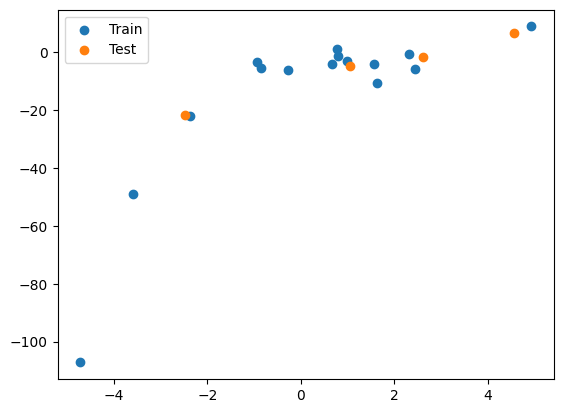

In [66]:
plt.scatter(train_x, train_y, label='Train')
plt.scatter(test_x, test_y, label='Test')
plt.legend()
plt.show()

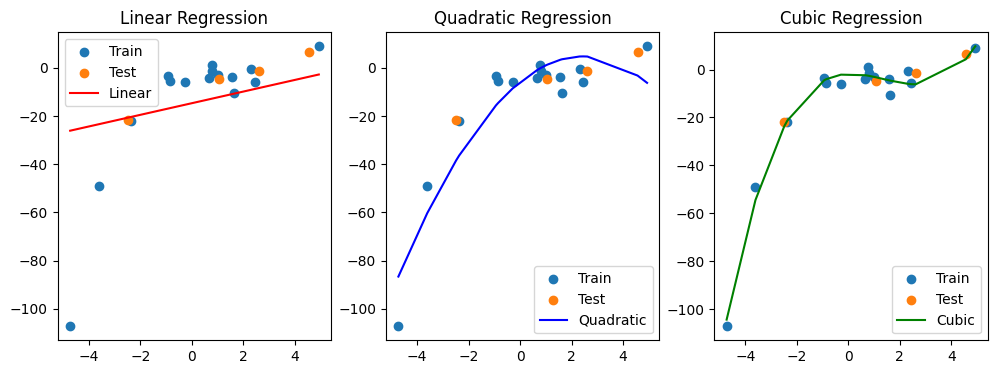

Linear MSE: 51.848222017137246
Quadratic MSE: 112.07532476906121
Cubic MSE: 8.072478823770275


In [67]:
#plot and show the comparison
plt.figure(figsize=(12, 4))
X = np.sort(X)
plt.subplot(1, 3, 1)
plt.scatter(train_x, train_y, label="Train")
plt.scatter(test_x, test_y, label="Test")
yl = l_1 + l_2*X
plt.plot(X, yl, label="Linear", color = 'red')
plt.legend()
plt.title("Linear Regression")

plt.subplot(1, 3, 2)
plt.scatter(train_x, train_y, label="Train")
plt.scatter(test_x, test_y, label="Test")
yq = q1 + q2*X + q3*X**2
plt.plot(X, yq, label="Quadratic", color = 'blue')
plt.legend()
plt.title("Quadratic Regression")

plt.subplot(1, 3, 3)
plt.scatter(train_x, train_y, label="Train")
plt.scatter(test_x, test_y, label="Test")
yc = c1 + c2*X + c3*X**2 + c4*X**3
plt.plot(X, yc, label="Cubic", color = 'green')
plt.legend()
plt.title("Cubic Regression")
plt.show()

print('Linear MSE:', mse_linear)
print('Quadratic MSE:', mse_quadratic)
print('Cubic MSE:', mse_cubic)



*   **Which regression task gives the best-fit line? Which regression task gives the lowest MSE on the test set?**




* **Answer**: MSE measures how well a regression model fits the data. A lower MSE indicates that the model's predictions are closer to a better fit. For this data set, Cubic MSE (8.072478823770275) on the test set is the lowest among the other regression procedures. This provides the best fit in terms of minimizing prediction error.*